After we set up null and alternative hypothesis, we need to use data to determine which hypothesis is most likely to be true. Two ways:

- Confidence intervals: 1. Simulate sampling distribution of our statistics (bootstraping). 2. See which hypothesis is consistent with what we observed in the sampling distribution. 
- Common way: 1. Simulate what we belive to be possible under the null. 2. See if our data is consistent with that.

We want to prove: Average height of all individuals in the coffee dataset is greater than 70.

$H_0: \mu \leq 70$

$H_1: \mu > 70$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('data/coffee_dataset.csv')

In [2]:
df.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


### Approach 1: Confidence intervals

In [3]:
sample_df = df.sample(150)

In [4]:
means = []
for _ in range(10000):
    bootsample = sample_df.sample(150, replace=True)
    means.append(bootsample.height.mean())

In [5]:
low, high = np.percentile(means, 2.5), np.percentile(means, 97.5) 

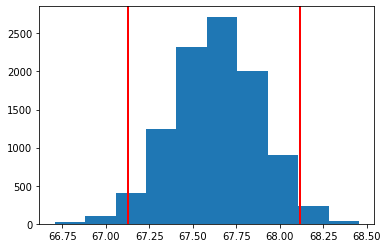

In [6]:
plt.hist(means);
plt.axvline(x=low, color='r', linewidth=2);
plt.axvline(x=high, color='r', linewidth=2)

In the above case, our interval was entirely below 70, which would suggest the null (the population mean is less than 70) is actually true.

### Approach 2: Common

1. Simulate from the closest value to the alternative that is still in the null space.

We can use the std of the sampling distribution to determine what is the samplling distribution would look like if it is from the null hypothesis. 

In [7]:
means = []
for _ in range(10000):
    bootsample = sample_df.sample(150, replace=True)
    means.append(bootsample.height.mean())

In [8]:
np.std(means)

0.2492166963157652

The sampling distribution of mean would follow a normal distribution by central limit theorem.

In [9]:
null_vals = np.random.normal(70,  np.std(means), 10000)

(array([   5.,   39.,  259., 1077., 2366., 3006., 2179.,  837.,  207.,
          25.]),
 array([68.95832132, 69.15122862, 69.34413592, 69.53704321, 69.72995051,
        69.92285781, 70.1157651 , 70.3086724 , 70.5015797 , 70.694487  ,
        70.88739429]),
 <a list of 10 Patch objects>)

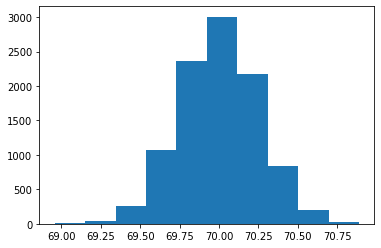

In [10]:
plt.hist(null_vals)

In [11]:
sample_df.height.mean()

67.6372260338609

Since our null is that the population mean is less than or equal to 70, we do have evidence to support this claim with our sample mean of approximately 67. This would suggest not rejecting our one-sided null alternative.

If we had a null where we asked if the population mean was equal to 70, then we would be able to reject this null in favor of an alternative that suggested the population mean was actually different from 70. You will see more of this idea in the upcoming content.

### Compute p-value

- Simulate the values of your statistic that are possible from the null.
- Calculate the value of the statistic you actually obtained in your data.
- Compare your statistic to the values from the null.
- Calculate the proportion of null values that are considered extreme based on your alternative.

In [12]:
sample_mean = sample_df.height.mean()

In [13]:
(null_vals > sample_mean).mean()

1.0

For a new null and alternative hypothesis:

$H_0: \mu \geq 70$

$H_1: \mu < 70$

In [14]:
(null_vals < sample_mean).mean()

0.0

For a new null and alternative hypothesis:

$H_0: \mu = 70$

$H_1: \mu \neq 70$

In [15]:
null_mean = 70
(null_vals < sample_mean).mean() + (null_vals > null_mean + null_mean - sample_mean).mean()

0.0